<a href="https://colab.research.google.com/github/ShrutiRathore15/Prodigy-ML-02/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mlxtend

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-learn 1.2.2 requires joblib>=1.1.1, but you'll have joblib 0.17.0 which is incompatible.


# Shruti Rathore

In [ ]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

import pandas as pd
import datetime
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data = pd.read_excel("Online Retail.xlsx")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
print(data['Quantity'].skew())
print(data['Quantity'].kurt())

-0.2640763070668848
119769.16003068598


In [ ]:
print(data['UnitPrice'].skew())
print(data['UnitPrice'].kurt())

186.50697172054137
59005.71909694814


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#removing null values
data = data[~(data.CustomerID.isnull())]
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.duplicated().sum()

5192

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(392692, 8)

In [ ]:
print("Quantity :")
print(data['Quantity'].skew())
print(data['Quantity'].kurt())

print("\n\n UnitPrice:")
print(data['UnitPrice'].skew())
print(data['UnitPrice'].kurt())

Quantity :
407.3456626876272
175940.08511259107


 UnitPrice:
202.74086107358727
57398.33504229725


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])
data['order_date'] = [d.date() for d in data['InvoiceDate']]
data['order_time'] = [d.time() for d in data['InvoiceDate']]

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [ ]:
data['TotalSum'] = data['UnitPrice']* data['Quantity']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34


In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
order_date             object
order_time             object
TotalSum              float64
dtype: object

In [ ]:
data['order_date']= pd.to_datetime(data['order_date'])

In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
order_date     datetime64[ns]
order_time             object
TotalSum              float64
dtype: object

In [ ]:
print('Min Invoice Date:',data.order_date.dt.date.min(),'max Invoice Date:', data.order_date.dt.date.max())
data.head(3)

Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_date,order_time,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00


In [ ]:
snapshot_date = data['order_date'].max() + timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 00:00:00')

In [ ]:
rfm = data.groupby(['CustomerID']).agg({'order_date': lambda x : (snapshot_date - x.max()).days,
                                      'InvoiceNo':'count','TotalSum': 'sum'})
rfm.rename(columns={'order_date':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},inplace= True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [ ]:
rfm.Recency.describe()

count    4338.000000
mean       93.059474
std       100.012264
min         1.000000
25%        18.000000
50%        51.000000
75%       142.750000
max       374.000000
Name: Recency, dtype: float64

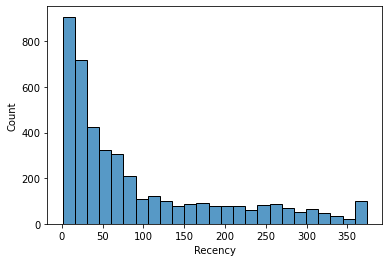

In [ ]:
x=rfm['Recency']
ax=sns.histplot(x)

In [ ]:
rfm.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

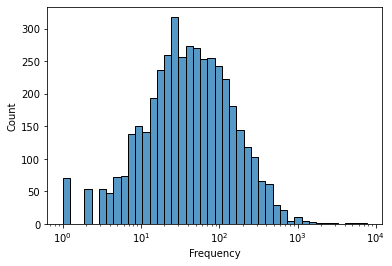

In [ ]:
x=rfm['Frequency']
ax=sns.histplot(x,log_scale=True)

In [ ]:
rfm.MonetaryValue.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: MonetaryValue, dtype: float64

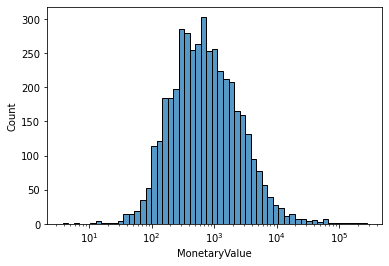

In [ ]:
x=rfm['MonetaryValue']
ax=sns.histplot(x, log_scale=True)

Text(0, 0.5, 'Frequency')

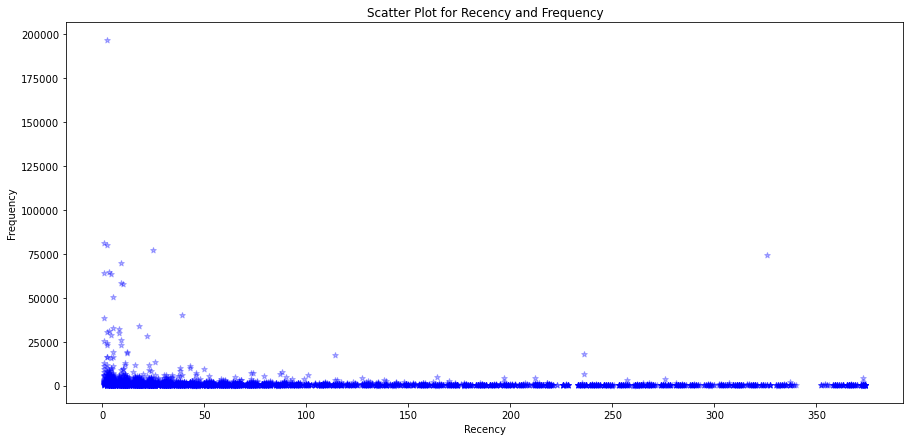

In [ ]:
#Recency Vs frequency

plt.figure(figsize=(15,7))
plt.scatter(rfm.groupby('CustomerID')['Recency'].sum(), data.groupby('CustomerID')['Quantity'].sum(),color = 'blue',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

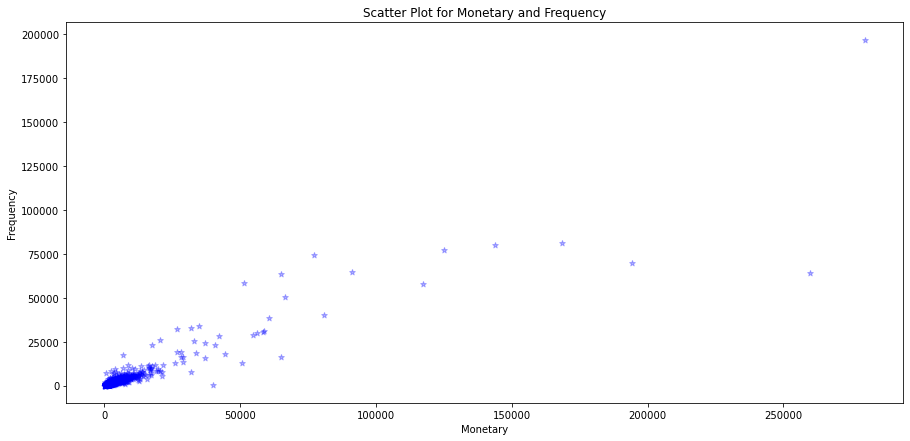

In [ ]:
#Recency Vs frequency

m_data = data.groupby('CustomerID')[['Quantity', 'TotalSum']].sum()

plt.figure(figsize=(15,7))
plt.scatter(m_data['TotalSum'], m_data['Quantity'], color = 'blue', marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

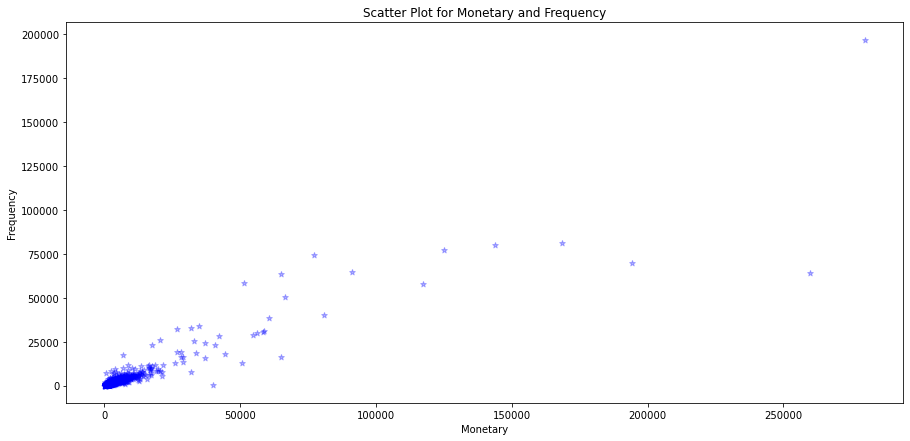

In [ ]:
#Frequency Vs Monetary

m_data = data.groupby('CustomerID')[['Quantity', 'TotalSum']].sum()

plt.figure(figsize=(15,7))
plt.scatter(m_data['TotalSum'], m_data['Quantity'],color = 'blue',marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

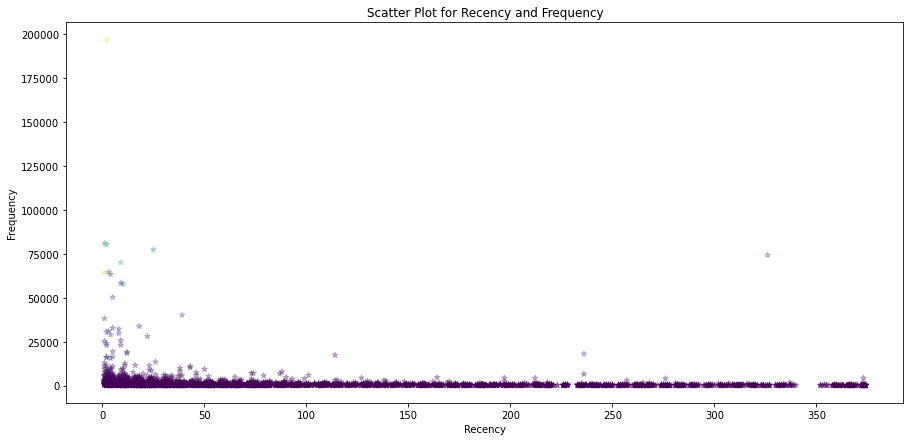

In [ ]:
#Recency Vs Frequency Vs Monetary

Monetary = data.groupby('CustomerID')['TotalSum'].sum()

plt.figure(figsize=(15,7))
plt.scatter(rfm.groupby('CustomerID')['Recency'].sum(), data.groupby('CustomerID')['Quantity'].sum(),
            marker = '*', alpha = 0.3,c=Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Clustering

In [ ]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     93.059474    90.523744    2048.688081
std     100.012264   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.750000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


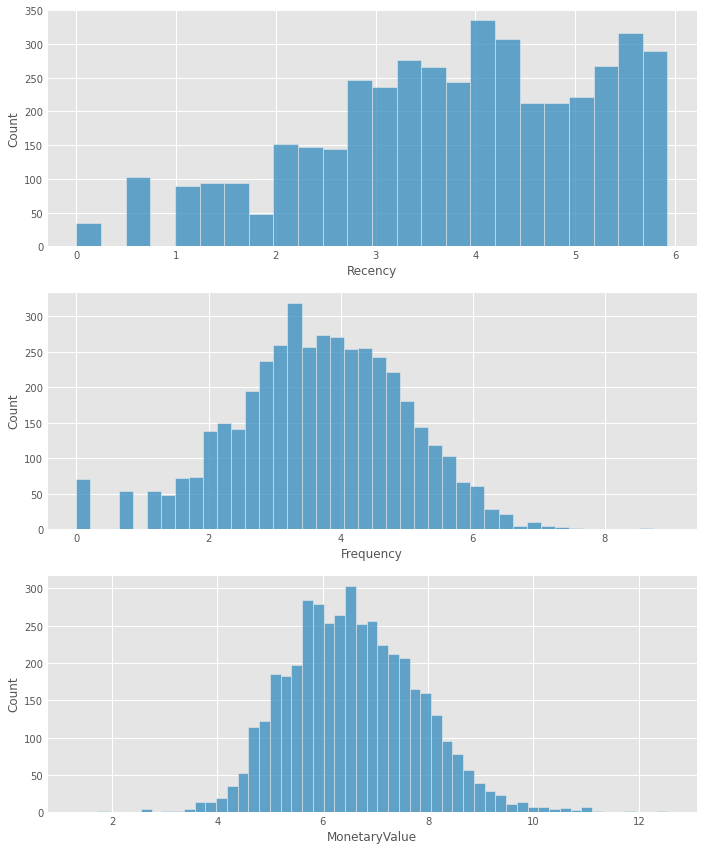

In [ ]:
#unskewing the data
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.histplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.histplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.histplot(rfm_log.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(rfm_log)

rfm_normalized= scaler.transform(rfm_log)

In [ ]:
kc = KMeans(n_clusters= 3, random_state=1)

kc.fit(rfm_normalized)

cluster_labels = kc.labels_


rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           173.0      15.0         295.0  1533
1            14.0     262.0        6606.0   948
2            68.0      65.0        1169.0  1857